**Train a deep neural network from scratch on the classic MNIST dataset**

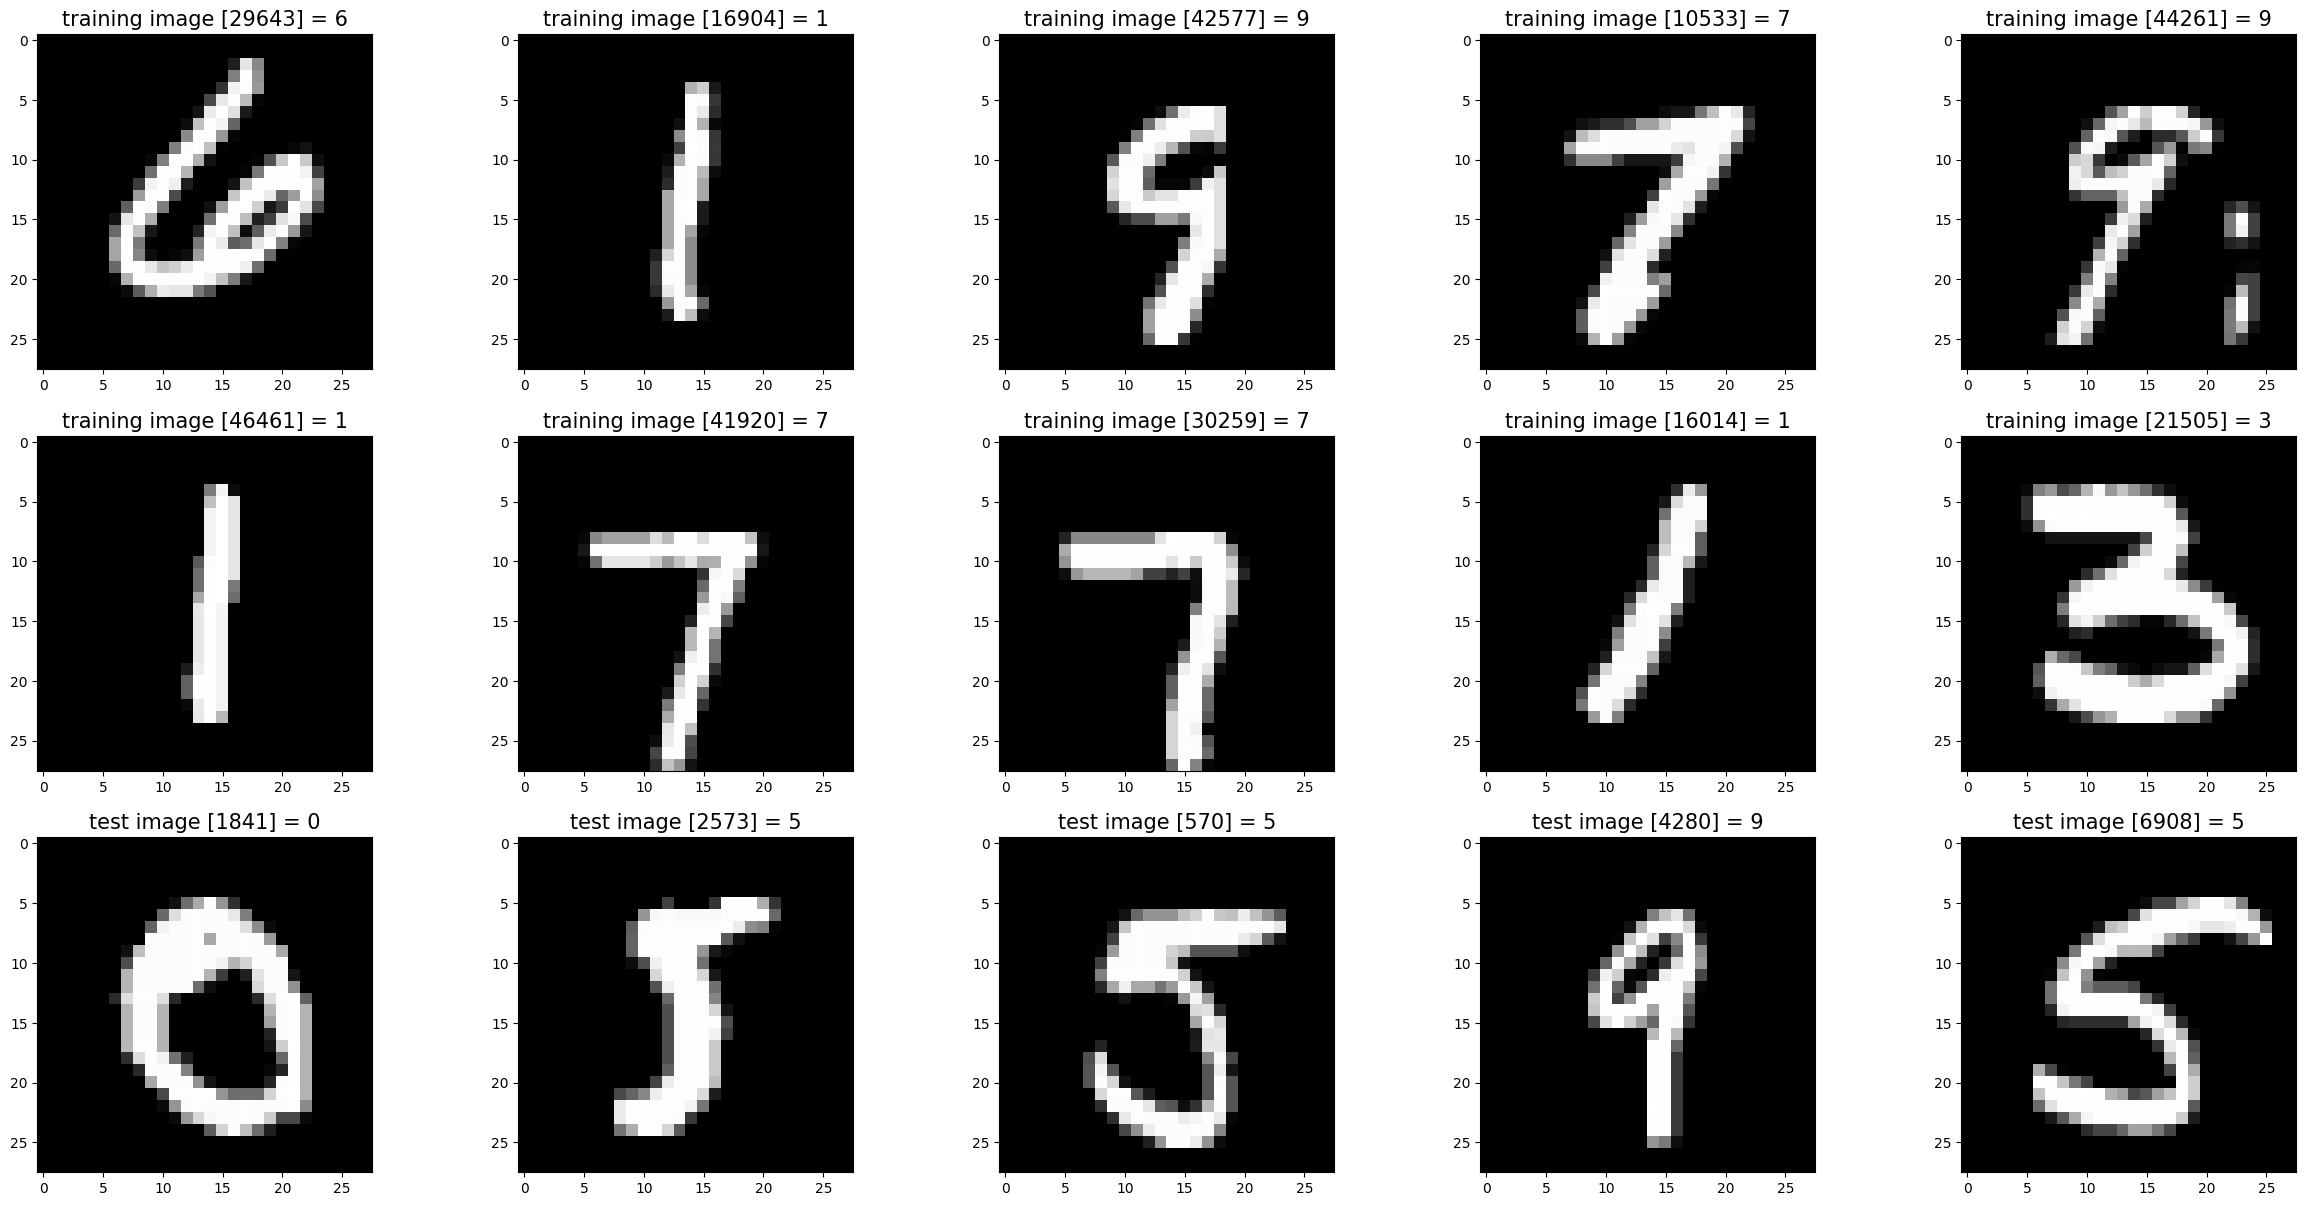

In [10]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
#input_path = '../input'
training_images_filepath = 'train-images.idx3-ubyte'
training_labels_filepath = 'train-labels.idx1-ubyte'
test_images_filepath = 't10k-images.idx3-ubyte'
test_labels_filepath = 't10k-labels.idx1-ubyte'

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)



Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/150
468/468 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.1500 - loss: 2.4009 - val_accuracy: 0.1225 - val_loss: 2.2181 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 3.2e-05.
Epoch 2/150
468/468 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.4742 - loss: 1.7927 - val_accuracy: 0.9193 - val_loss: 0.8557 - learning_rate: 3.2000e-05

Epoch 3: LearningRateScheduler setting learning rate to 5.4e-05.
Epoch 3/150
468/468 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8262 - loss: 1.1932 - val_accuracy: 0.9669 - val_loss: 0.6666 - learning_rate: 5.4000e-05

Epoch 4: LearningRateScheduler setting learning rate to 7.6e-05.
Epoch 4/150
468/468 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9059 - loss: 1.0113 - val_accuracy: 0.9604 - val_loss: 0.6603 - learning_rate: 7.6000e-05

Epoch 5: LearningRateScheduler setting learning rate to 9.8e-05.
Epoch 5/150
468/468 ━━━━━━━━━━━━━━━━

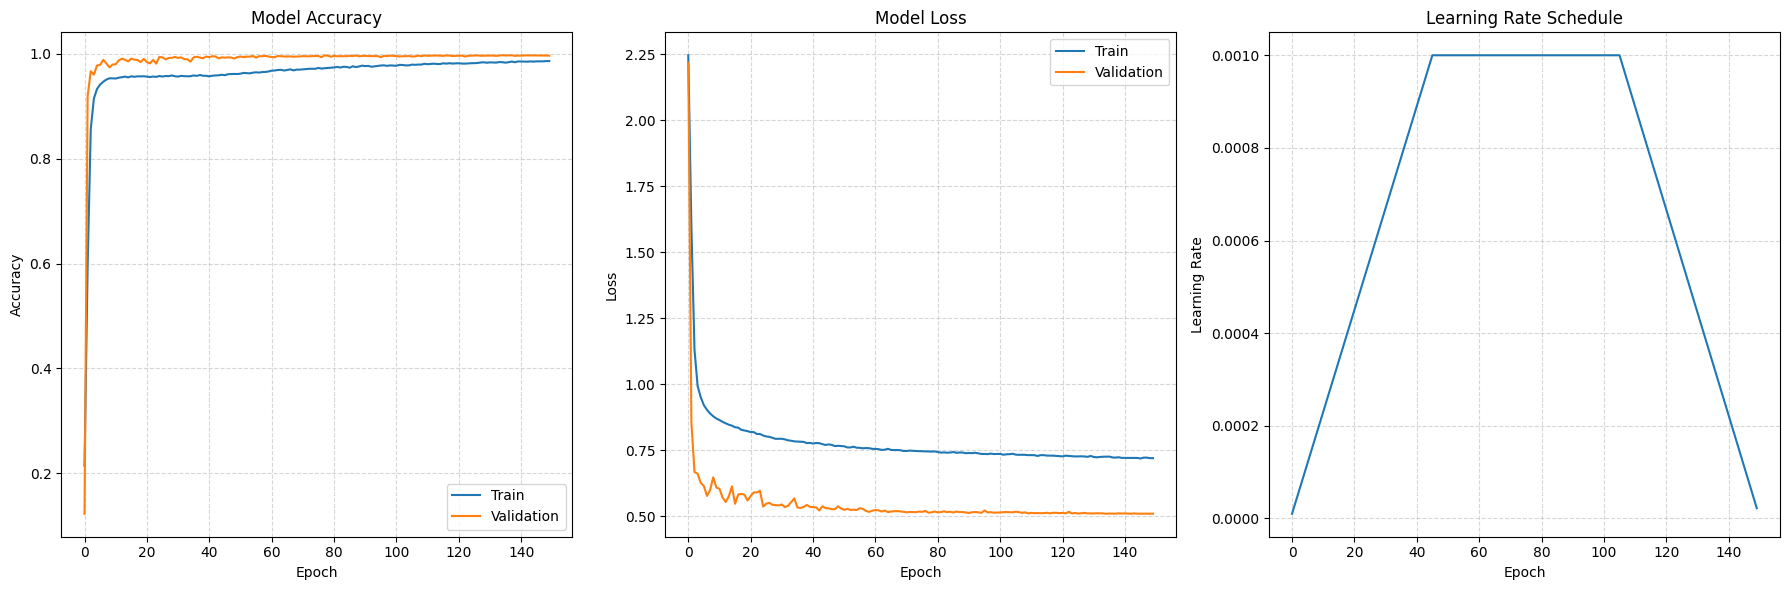

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
class MnistDataloader:
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            image_data = array("B", file.read())

        images = np.array(image_data, dtype=np.uint8).reshape(size, rows, cols)
        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)

loader = MnistDataloader(
    'train-images.idx3-ubyte',
    'train-labels.idx1-ubyte',
    't10k-images.idx3-ubyte',
    't10k-labels.idx1-ubyte'
)
(x_train, y_train), (x_test, y_test) = loader.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)   # (N, 28, 28, 1)
x_test  = np.expand_dims(x_test,  -1)
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test,  10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15
)
datagen.fit(x_train)
def mixup_generator(datagen, x, y, batch_size, alpha=0.2):
    gen = datagen.flow(x, y, batch_size=batch_size, shuffle=True)
    while True:
        xb, yb = next(gen)
        lam = np.random.beta(alpha, alpha, size=(xb.shape[0], 1, 1, 1))
        lam_y = lam.reshape(xb.shape[0], 1)
        idx = np.random.permutation(xb.shape[0])
        xb2, yb2 = xb[idx], yb[idx]
        xb_mixed = lam * xb + (1 - lam) * xb2
        yb_mixed = lam_y * yb + (1 - lam_y) * yb2
        yield xb_mixed, yb_mixed

batch_size = 128
steps_per_epoch = len(x_train) // batch_size

def residual_block(x, filters):
    shortcut = x
#       Conv2D(filters, 3, padding='same', use_bias=False):
    x = layers.Conv2D(filters, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    in_channels = int(shortcut.shape[-1])
    if in_channels != filters:
        shortcut = layers.Conv2D(filters, 1, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet():
    inp = layers.Input(shape=(28,28,1))
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inp)
    x = layers.BatchNormalization()(x)

    x = residual_block(x, 32)
    x = layers.MaxPooling2D()(x)

    x = residual_block(x, 64)
    x = layers.MaxPooling2D()(x)

    x = residual_block(x, 128)
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(10, activation='softmax')(x)
    return models.Model(inputs=inp, outputs=out)

model = build_resnet()
max_lr, min_lr, epochs = 1e-3, 1e-5, 150

lr_history = []
track_lr = callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs: lr_history.append(float(model.optimizer.learning_rate))
)

def one_cycle_scheduler(epoch):
    pct = epoch / epochs
    if pct < 0.3:
        return min_lr + (max_lr - min_lr) * (pct / 0.3)
    elif pct < 0.7:
        return max_lr
    else:
        return max_lr * (1 - (pct - 0.7) / 0.3)

lr_callback = callbacks.LearningRateScheduler(one_cycle_scheduler, verbose=1)

try:
    from tensorflow.keras.optimizers.experimental import AdamW
    optimizer = AdamW(
        learning_rate=one_cycle_scheduler(0),
        weight_decay=1e-4
    )
except ImportError:
    optimizer = optimizers.Adam(learning_rate=one_cycle_scheduler(0))

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

train_gen = mixup_generator(datagen, x_train, y_train_cat, batch_size)
history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(x_test, y_test_cat),
    callbacks=[lr_callback, early_stop, track_lr]
)

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc * 100:.4f}%")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(lr_history)
plt.title('Learning Rate Schedule')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()